# Life Expectancy Predictions
Our society has created several technological advances and innovations that have improved health care and education across the board while creating new working opportunities and provided environmentally friendly methods to use resources. These innovations can have a huge impact on the life expectancy in countries in a positive way. However, these technologies and other progress have not been distributed equally across the world. As a result, we live in a world with vast discrepancies in quality of life and overall life expectancy from country to country. It is our team’s intention to answer why this is the case utilizing the tools that we have learned in class. A combination of data cleaning and machine learning techniques will be applied.

Our group is using a dataset about countries’ life expectancy and socioeconomic background. It includes 174 out of the 195 countries in the world. It has the average life expectancy for each country given and additional information about their socio-economic status.

Dataset: https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank

## Read in data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import time

In [2]:
data = pd.read_csv('life expectancy.csv')
data = data.rename(columns={'Life Expectancy World Bank': 'Life Expectancy','IncomeGroup': 'Income Group'})
data = data.drop(columns=['Year'])

In [3]:
data.head()

,Country Name,Country Code,Region,Income Group,Life Expectancy,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


### Dealing with null values

In [4]:
# Remove rows where life expectancy has a null value
data = data[~data["Life Expectancy"].isna()]
data.reset_index(inplace = True)

In [5]:
# Other null values are filled with the mean of its column
data["Health Expenditure %"].fillna(np.mean(data["Health Expenditure %"]), inplace=True)
data["Education Expenditure %"].fillna(np.mean(data["Education Expenditure %"]), inplace=True)
data["Prevelance of Undernourishment"].fillna(np.mean(data["Prevelance of Undernourishment"]), inplace=True)
data["Corruption"].fillna(np.mean(data["Corruption"]), inplace=True)
data["Sanitation"].fillna(np.mean(data["Sanitation"]), inplace=True)
data["CO2"].fillna(np.mean(data["CO2"]), inplace=True)
data["Unemployment"].fillna(np.mean(data["Unemployment"]), inplace=True)

<ipython-input-5-877dfd6ff4e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Health Expenditure %"].fillna(np.mean(data["Health Expenditure %"]), inplace=True)
<ipython-input-5-877dfd6ff4e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Education Expenditure %"].fillna(np.mean(data["Education Expenditure %"]), inplace=True)
<ipython-input-5-877dfd6ff4e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Prevelanc

In [6]:
# Make sure there are no more null values
np.sum(data.isna())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


index                             0
Country Name                      0
Country Code                      0
Region                            0
Income Group                      0
Life Expectancy                   0
Prevelance of Undernourishment    0
CO2                               0
Health Expenditure %              0
Education Expenditure %           0
Unemployment                      0
Corruption                        0
Sanitation                        0
Injuries                          0
Communicable                      0
NonCommunicable                   0
dtype: int64

### Changing categorical variables to numbers

In [7]:
# Find how many groups are in our categorical variables
print("There are",len(data["Region"].unique()),"values in the categorical variable 'Region'")
print("They are:",data["Region"].unique())
print("There are",len(data["Income Group"].unique()),"values in the categorical variable 'Income Group'")
print("They are:",data["Income Group"].unique())

There are 7 values in the categorical variable 'Region'
They are: ['South Asia' 'Sub-Saharan Africa' 'Europe & Central Asia'
 'Middle East & North Africa' 'Latin America & Caribbean'
 'East Asia & Pacific' 'North America']
There are 4 values in the categorical variable 'Income Group'
They are: ['Low income' 'Lower middle income' 'Upper middle income' 'High income']


In [8]:
enc = OneHotEncoder()

In [9]:
# Create an encoded data frame for region
enc_data_region = pd.DataFrame(enc.fit_transform(data[['Region']]).toarray())
regions = {5: "South Asia",6: "Sub-Saharan Africa",1: "Europe & Central Asia",3: "Middle East & North Africa",
          2: "Latin America & Caribbean",0: "East Asia & Pacific",4: "North America"}
enc_data_region = enc_data_region.rename(columns=regions)

In [10]:
# Create an encoded data frame for income group
enc_data_income_group = pd.DataFrame(enc.fit_transform(data[['Income Group']]).toarray())
income_groups = {1: "Low Income",2: "Lower Middle Income",3: "Upper Middle Income",0: "High Income"}
enc_data_income_group = enc_data_income_group.rename(columns=income_groups)

In [11]:
# Add encoded data frames to the main dataset
data = data.join(enc_data_region)
data = data.join(enc_data_income_group)

# Drop the columns that are encoded
data = data.drop(columns=["index","Region","Income Group"])

In [12]:
data = data.drop(columns=['Country Name','Country Code'])

In [13]:
data.head()

,Life Expectancy,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,...,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa,High Income,Low Income,Lower Middle Income,Upper Middle Income
0,56.308,47.8,730.0,6.213892,4.521865,10.809000,2.831919,52.326204,2179727.10,9689193.70,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,47.059,67.5,15960.0,4.483516,4.521865,4.004000,2.831919,52.326204,1392080.71,11190210.53,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,74.288,4.9,3230.0,7.139524,3.458700,18.575001,2.831919,40.520895,117081.67,140894.78,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,74.544,2.8,97200.0,2.484370,4.521865,2.493000,2.831919,52.326204,144678.14,65271.91,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,73.755,3.0,125260.0,8.371798,4.833740,17.320000,2.831919,48.053996,1397676.07,1507068.98,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
list(data)

['Life Expectancy',
 'Prevelance of Undernourishment',
 'CO2',
 'Health Expenditure %',
 'Education Expenditure %',
 'Unemployment',
 'Corruption',
 'Sanitation',
 'Injuries',
 'Communicable',
 'NonCommunicable',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'North America',
 'South Asia',
 'Sub-Saharan Africa',
 'High Income',
 'Low Income',
 'Lower Middle Income',
 'Upper Middle Income']

### Visualizing our data

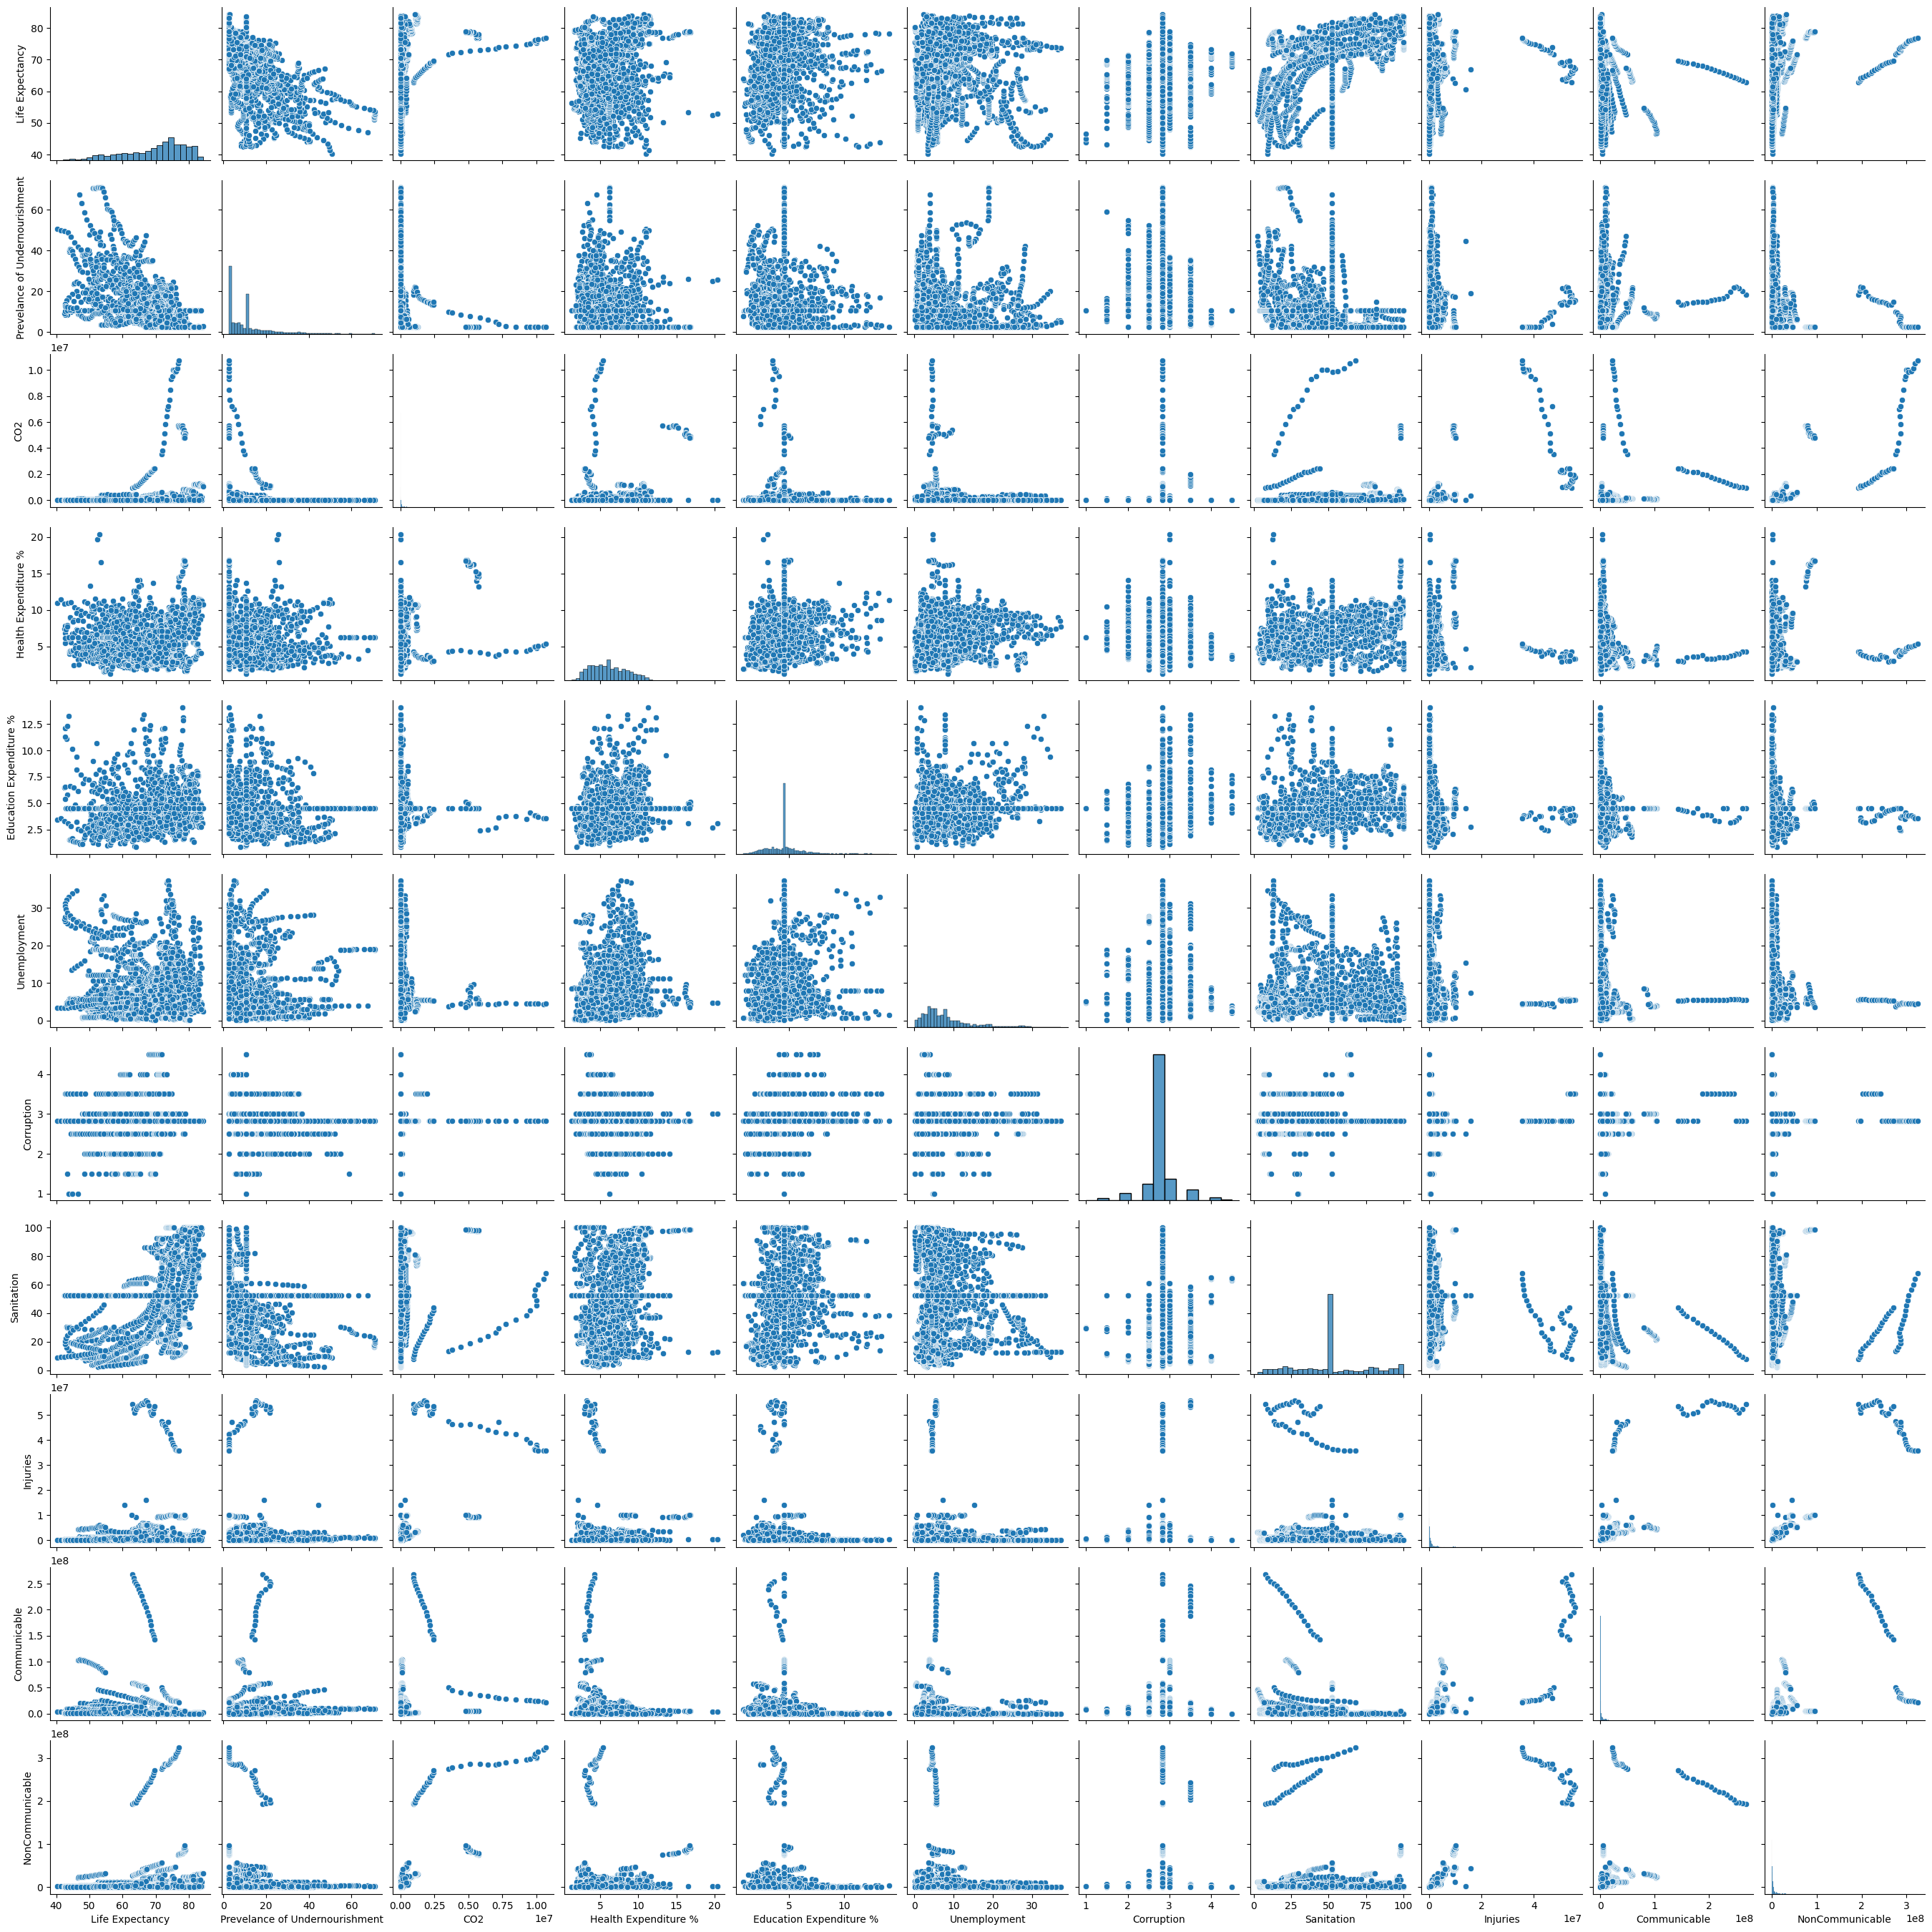

In [15]:
sns.pairplot(data[['Life Expectancy',
       'Prevelance of Undernourishment', 'CO2', 'Health Expenditure %',
       'Education Expenditure %', 'Unemployment', 'Corruption', 'Sanitation',
       'Injuries', 'Communicable', 'NonCommunicable']])

Text(0.5, 0, 'NonCommunicable')

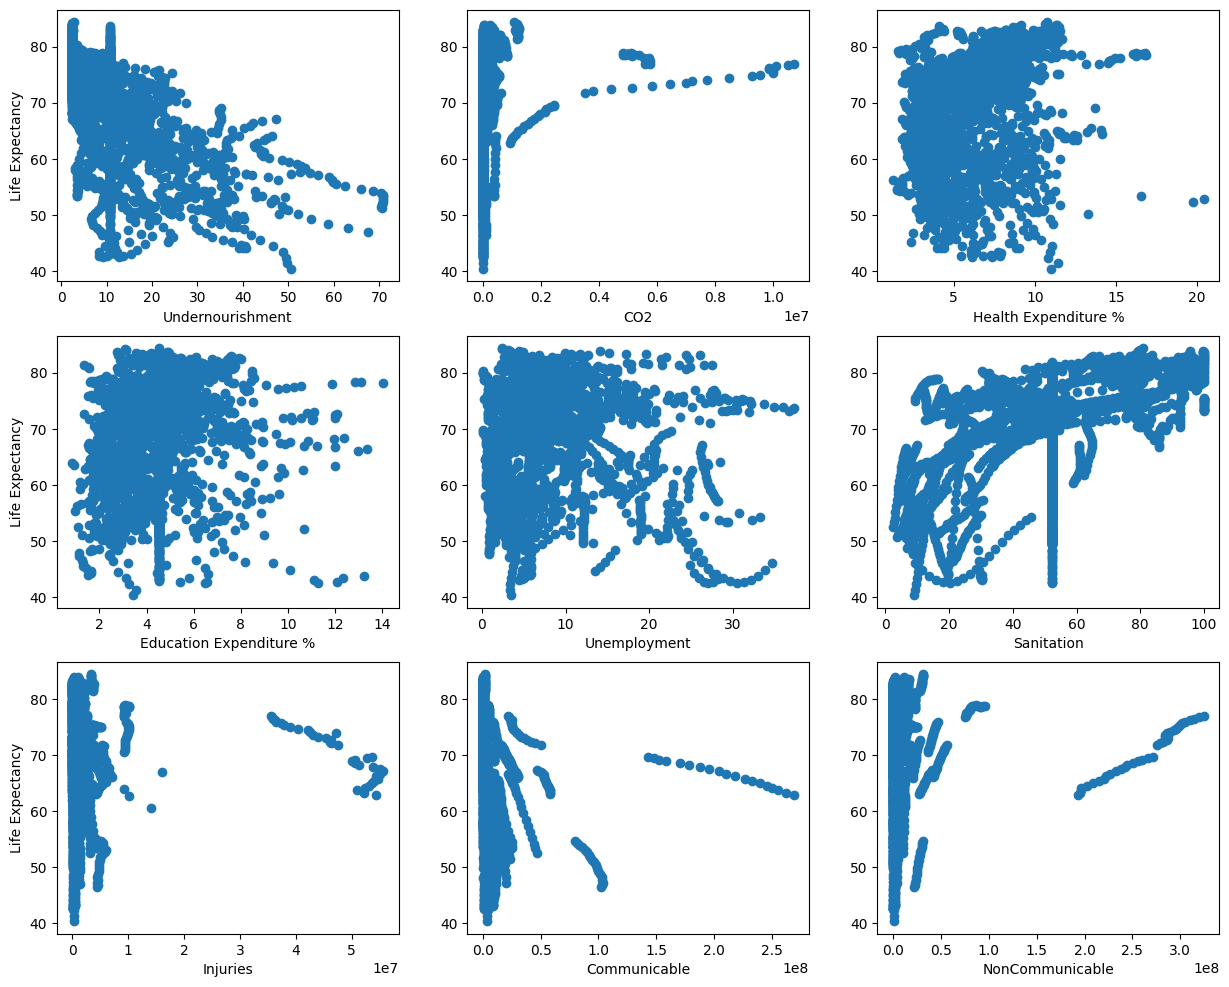

In [16]:
plt.figure(figsize=(15,12))
plt.subplot(3,3,1)
plt.scatter(data['Prevelance of Undernourishment'],data['Life Expectancy'])
plt.xlabel('Undernourishment')
plt.ylabel('Life Expectancy')

plt.subplot(3,3,2)
plt.scatter(data['CO2'],data['Life Expectancy'])
plt.xlabel('CO2')

plt.subplot(3,3,3)
plt.scatter(data['Health Expenditure %'],data['Life Expectancy'])
plt.xlabel('Health Expenditure %')

plt.subplot(3,3,4)
plt.scatter(data['Education Expenditure %'],data['Life Expectancy'])
plt.xlabel('Education Expenditure %')
plt.ylabel('Life Expectancy')

plt.subplot(3,3,5)
plt.scatter(data['Unemployment'],data['Life Expectancy'])
plt.xlabel('Unemployment')

plt.subplot(3,3,6)
plt.scatter(data['Sanitation'],data['Life Expectancy'])
plt.xlabel('Sanitation')

plt.subplot(3,3,7)
plt.scatter(data['Injuries'],data['Life Expectancy'])
plt.xlabel('Injuries')
plt.ylabel('Life Expectancy')

plt.subplot(3,3,8)
plt.scatter(data['Communicable'],data['Life Expectancy'])
plt.xlabel('Communicable')

plt.subplot(3,3,9)
plt.scatter(data['NonCommunicable'],data['Life Expectancy'])
plt.xlabel('NonCommunicable')

## Regression
### Creating a Baseline Regression Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [18]:
# Features: 1-co2, 2-health expenditure, 3-education expenditure, and 4-unemployment
X_1 = np.array(data)[:, 4].reshape(-1,1)
X_2 = np.array(data)[:, 5].reshape(-1,1)
X_3 = np.array(data)[:, 6].reshape(-1,1)
X_4 = np.array(data)[:, 7].reshape(-1,1)

print('Features:\n', X_4)
print(X_1.shape)

# Labels: life expectancy
y = np.array(data)[:, 2].reshape(-1,1)

print('Labels:\n', y)
print(y.shape)

Features:
 [[52.32620352]
 [52.32620352]
 [40.52089533]
 ...
 [52.32620352]
 [52.32620352]
 [25.96354376]]
(3118, 1)
Labels:
 [[   730.        ]
 [ 15960.        ]
 [  3230.        ]
 ...
 [439640.01464844]
 [  6800.00019073]
 [ 11760.00022888]]
(3118, 1)


In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y, test_size = 0.20)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y, test_size = 0.20)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y, test_size = 0.20)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_4, y, test_size = 0.20)

print('X train:', X_train1.shape,'  y train:', y_train1.shape)
print('X test:', X_test1.shape, '    y test:', y_test1.shape)

X train: (2494, 1)   y train: (2494, 1)
X test: (624, 1)     y test: (624, 1)


In [20]:
# Create model
lin_reg1 = LinearRegression()
lin_reg2 = LinearRegression()
lin_reg3 = LinearRegression()
lin_reg4 = LinearRegression()

print(lin_reg1)
print(lin_reg2)
print(lin_reg3)
print(lin_reg4)

# Initialize data
lin_reg1.fit(X_train1,y_train1)
lin_reg2.fit(X_train2,y_train2)
lin_reg3.fit(X_train3,y_train3)
lin_reg4.fit(X_train4,y_train4)

LinearRegression()
LinearRegression()
LinearRegression()
LinearRegression()


LinearRegression()

In [21]:
# Make prediction
y_pred1 = lin_reg1.predict(X_test1)
y_pred2 = lin_reg2.predict(X_test2)
y_pred3 = lin_reg3.predict(X_test3)
y_pred4 = lin_reg4.predict(X_test4)

# Predicted roughly the same life expectancy
# print(y_pred1[0])
# print(y_pred2[0])
# print(y_pred3[0])
# print(y_pred4[0])

# Score
test_score1 = lin_reg1.score(X_test1, y_test1)
test_score2 = lin_reg2.score(X_test2, y_test2)
test_score3 = lin_reg3.score(X_test3, y_test3)
test_score4 = lin_reg4.score(X_test4, y_test4)

print('Testing score co2:', test_score1)
print('Testing score health expenditure:', test_score2)
print('Testing score educatoin expenditure:', test_score3)
print('Testing score unemployment:', test_score4)

# MSE
mse1 = mean_squared_error(y_true=y_test1,y_pred=y_pred1) #default=True
mse2 = mean_squared_error(y_true=y_test2,y_pred=y_pred2) #default=True
mse3 = mean_squared_error(y_true=y_test3,y_pred=y_pred3) #default=True
mse4 = mean_squared_error(y_true=y_test4,y_pred=y_pred4) #default=True

print('\nMSE co2:', mse1)
print('MSE health expenditure:', mse2)
print('MSE education expenditure:', mse3)
print('MSE unemployment:', mse4)

# RMSE
rmse1 = mean_squared_error(y_true=y_test1,y_pred=y_pred1,squared=False)
rmse2 = mean_squared_error(y_true=y_test2,y_pred=y_pred2,squared=False)
rmse3 = mean_squared_error(y_true=y_test3,y_pred=y_pred3,squared=False)
rmse4 = mean_squared_error(y_true=y_test4,y_pred=y_pred4,squared=False)

print('\nRMSE co2:', rmse1)
print('RMSE health expenditure:', rmse2)
print('RMSE education expenditure:', rmse3)
print('RMSE unemployment:', rmse4)

Testing score co2: 0.0011042138727150874
Testing score health expenditure: 0.0005434634689079898
Testing score educatoin expenditure: -0.0016477157597276637
Testing score unemployment: 0.007847775224048004

MSE co2: 424993153034.9817
MSE health expenditure: 1054537119532.2196
MSE education expenditure: 871161424574.6726
MSE unemployment: 483956408908.1859

RMSE co2: 651914.9891166652
RMSE health expenditure: 1026906.5778016127
RMSE education expenditure: 933360.2865853425
RMSE unemployment: 695669.7556371025


#### Visualize Predictions

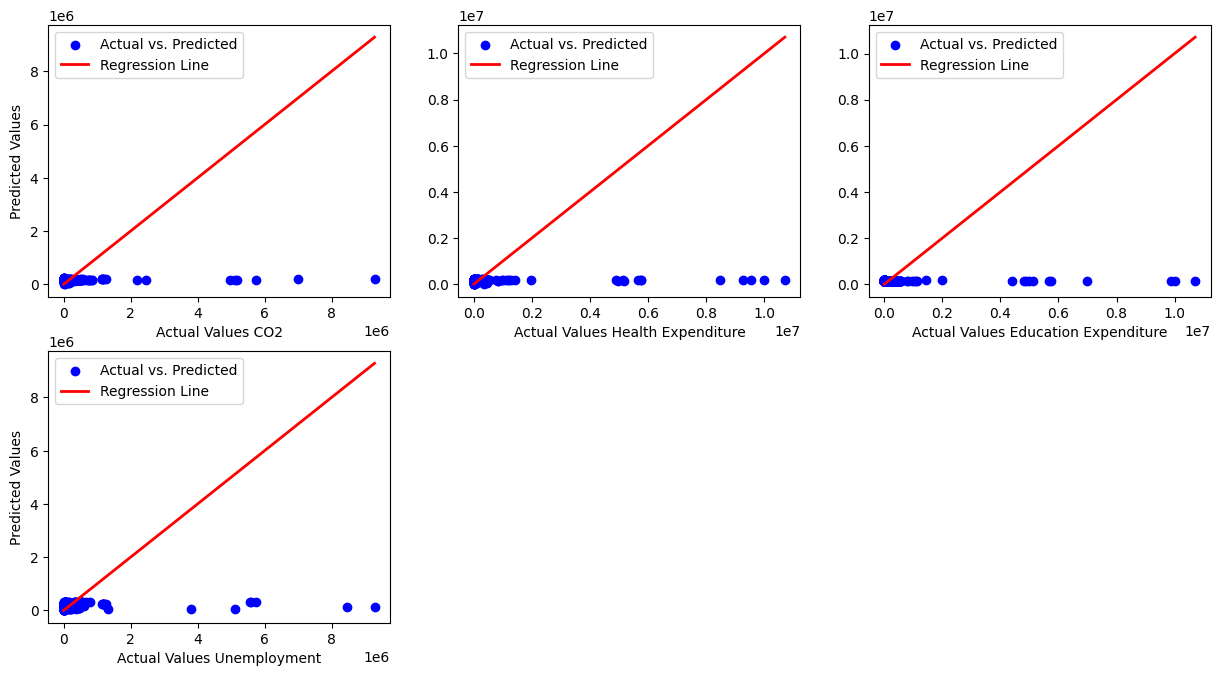

In [22]:
plt.figure(figsize=(15,12))

# co2
plt.subplot(3,3,1)
plt.scatter(y_test1, y_pred1, c='blue', label="Actual vs. Predicted")
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], linestyle='-', color='red', linewidth=2, label="Regression Line")
plt.xlabel("Actual Values CO2")
plt.ylabel("Predicted Values")
plt.legend(loc='upper left')

# health expenditure
plt.subplot(3,3,2)
plt.scatter(y_test2, y_pred2, c='blue', label="Actual vs. Predicted")
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], linestyle='-', color='red', linewidth=2, label="Regression Line")
plt.xlabel("Actual Values Health Expenditure")
plt.legend(loc='upper left')

# education expenditure
plt.subplot(3,3,3)
plt.scatter(y_test3, y_pred3, c='blue', label="Actual vs. Predicted")
plt.plot([min(y_test3), max(y_test3)], [min(y_test3), max(y_test3)], linestyle='-', color='red', linewidth=2, label="Regression Line")
plt.xlabel("Actual Values Education Expenditure")
plt.legend(loc='upper left')

# unemployment
plt.subplot(3,3,4)
plt.scatter(y_test4, y_pred4, c='blue', label="Actual vs. Predicted")
plt.plot([min(y_test4), max(y_test4)], [min(y_test4), max(y_test4)], linestyle='-', color='red', linewidth=2, label="Regression Line")
plt.xlabel("Actual Values Unemployment")
plt.ylabel("Predicted Values")
plt.legend(loc='upper left')
plt.show()

#### Visualize Data

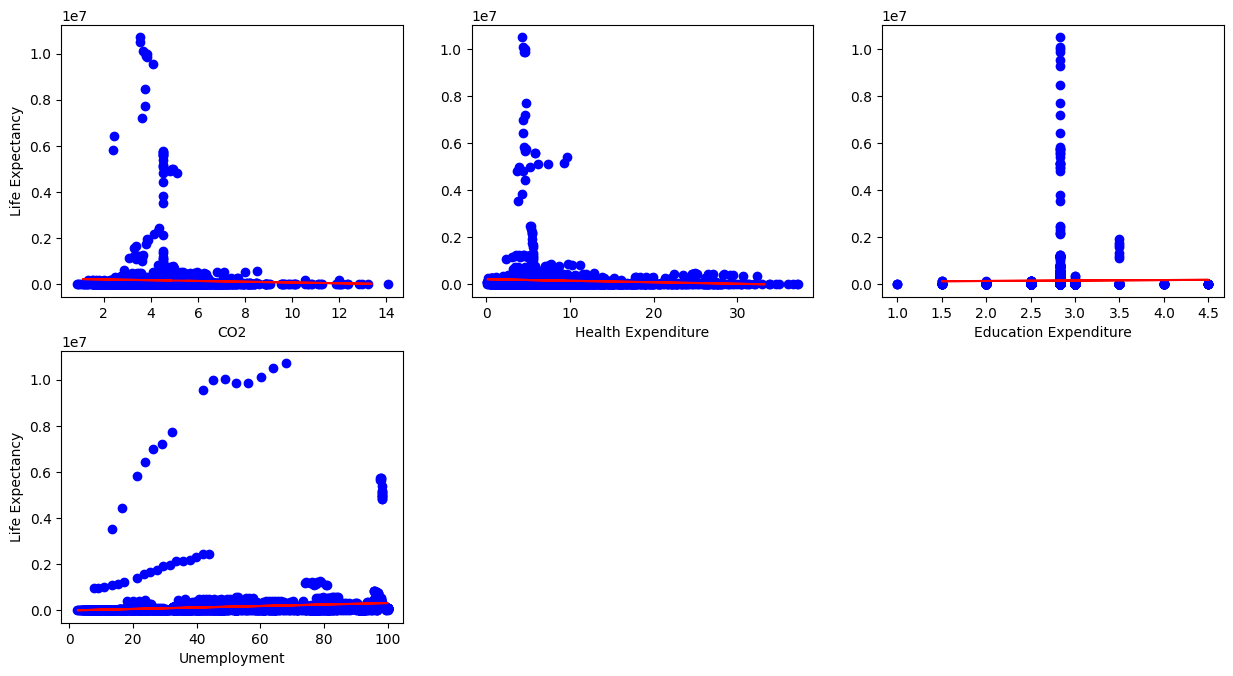

In [23]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
plt.scatter(X_train1,y_train1, color='b')
plt.plot(X_test1, y_pred1, color ='r')
plt.xlabel('CO2')
plt.ylabel('Life Expectancy')

plt.subplot(3,3,2)
plt.scatter(X_train2,y_train2, color='b')
plt.plot(X_test2, y_pred2, color ='r')
plt.xlabel('Health Expenditure')

plt.subplot(3,3,3)
plt.scatter(X_train3,y_train3, color='b')
plt.plot(X_test3, y_pred3, color ='r')
plt.xlabel('Education Expenditure')

plt.subplot(3,3,4)
plt.scatter(X_train4,y_train4, color='b')
plt.plot(X_test4, y_pred4, color ='r')
plt.xlabel('Unemployment')
plt.ylabel('Life Expectancy')

plt.show()

### Regression Base Model with Multiple Features

In [24]:
X = data[['CO2', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment']]
X.head()

,CO2,Health Expenditure %,Education Expenditure %,Unemployment
0,730.0,6.213892,4.521865,10.809000
1,15960.0,4.483516,4.521865,4.004000
2,3230.0,7.139524,3.458700,18.575001
3,97200.0,2.484370,4.521865,2.493000
4,125260.0,8.371798,4.833740,17.320000


In [25]:
y = data['Life Expectancy']
y

0       56.308
1       47.059
2       74.288
3       74.544
4       73.755
         ...  
3113    70.474
3114    73.321
3115    64.131
3116    63.886
3117    61.490
Name: Life Expectancy, Length: 3118, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X train:', X_train.shape,'  y train:', y_train.shape)
print('X test:', X_test.shape, '    y test:', y_test.shape)

X train: (2494, 4)   y train: (2494,)
X test: (624, 4)     y test: (624,)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Make a Prediction

In [28]:
y_pred = model.predict(X_test)

print(y_pred.shape, y_pred[0])

(624,) 71.80835545694154


In [29]:
print("Training Score:",model.score(X_train,y_train))
print("Testing Score:",model.score(X_test,y_test))

Training Score: 0.14030455354554716
Testing Score: 0.07690828160530805


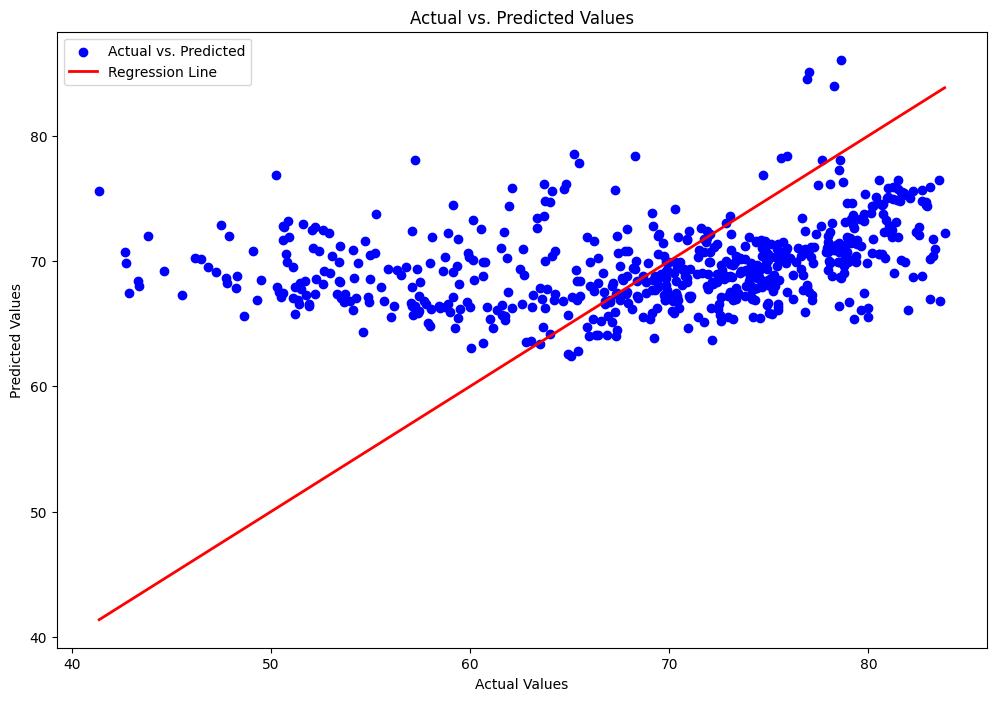

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred, c='blue', label="Actual vs. Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', linewidth=2, label="Regression Line")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.show()

## Comparing different regression models

In [31]:
reg_train = {}
reg_test = {}
reg_t = {}

In [32]:
X = data.drop(columns=["Life Expectancy"])
y = data['Life Expectancy']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [34]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [35]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Creating a function to run models

In [36]:
def model(mod,X_train,y_train,X_test,y_test):
    st = time.time()
    m = mod
    m.fit(X_train,y_train)
    et = time.time()

    train_score = m.score(X_train,y_train)
    test_score = m.score(X_test,y_test)

    return train_score, test_score, et-st

#### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lin_train, lin_test, lin_time = model(LinearRegression(),X_train,y_train,X_test,y_test)
reg_train['LinReg'] = lin_train
reg_test['LinReg'] = lin_test
reg_t['LinReg'] = lin_time

#### SVR

In [39]:
from sklearn.svm import SVR

In [40]:
svr_train, svr_test, svr_time = model(SVR(C=1000),X_train,y_train,X_test,y_test)
reg_train['SVM'] = svr_train
reg_test['SVM'] = svr_test
reg_t['SVM'] = svr_time

#### MLP

In [41]:
from sklearn.neural_network import MLPRegressor

In [42]:
mlpr_train, mlpr_test, mlpr_time = model(MLPRegressor(max_iter=2000),X_train,y_train,X_test,y_test)
reg_train['MLP'] = mlpr_train
reg_test['MLP'] = mlpr_test
reg_t['MLP'] = mlpr_time

#### Lasso

In [43]:
from sklearn.linear_model import Lasso

In [44]:
lasr_train, lasr_test, lasr_time = model(Lasso(),X_train,y_train,X_test,y_test)
reg_train['Lasso'] = lasr_train
reg_test['Lasso'] = lasr_test
reg_t['Lasso'] = lasr_time

#### Ridge

In [45]:
from sklearn.linear_model import Ridge

In [46]:
ridr_train, ridr_test, ridr_time = model(Ridge(),X_train,y_train,X_test,y_test)
reg_train['Ridge'] = ridr_train
reg_test['Ridge'] = ridr_test
reg_t['Ridge'] = ridr_time

#### Comparing Regression Models

In [47]:
reg_train_keys = reg_train.keys()
reg_train_values = reg_train.values()
reg_test_keys = reg_test.keys()
reg_test_values = reg_test.values()
reg_time_keys = reg_t.keys()
reg_time_values = reg_t.values()

In [48]:
barWidth = 0.25
br1 = np.arange(len(reg_train))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

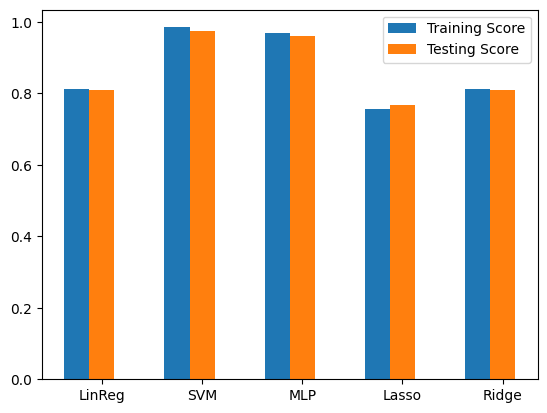

In [49]:
plt.bar(br1,reg_train_values,label="Training Score",width=barWidth)
plt.bar(br2,reg_test_values,label="Testing Score",width=barWidth)
plt.xticks([r + barWidth for r in range(len(reg_train))],
        list(reg_train.keys()))

plt.legend()

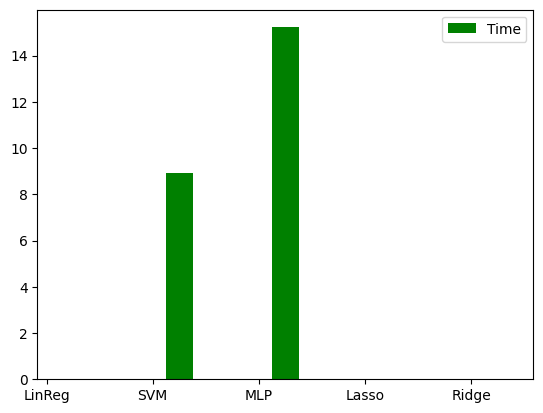

In [50]:
plt.bar(br3,reg_time_values,label="Time",width=barWidth,color="green")
plt.xticks([r + barWidth for r in range(len(reg_train))],
        list(reg_train.keys()))

plt.legend()

In [51]:
from prettytable import PrettyTable
regTable = PrettyTable()

In [52]:
regTable.add_column("Metric",["Training Score","Testing Score","Time"])
for i in range(len(list(reg_train.values()))):
    regTable.add_column(list(reg_train.keys())[i],np.round(np.array([list(reg_train.values())[i],list(reg_test.values())[i],list(reg_t.values())[i]]),decimals=2))
regTable

Metric,LinReg,SVM,MLP,Lasso,Ridge
Training Score,0.81,0.98,0.97,0.76,0.81
Testing Score,0.81,0.97,0.96,0.77,0.81
Time,0.0,8.92,15.22,0.0,0.0


### Feature Ranking for Regression

Next we are going to rank the features using sklearn RFE. That way we can see what features affect the life expectancy the most. This is going to give us an idea of what holds more weight in the life expectancy of a country

In [53]:
from sklearn.feature_selection import RFE

In [54]:
estimator = SVR(C=100,kernel='linear')
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)

In [55]:
for j in range(0,6):
    for i in range(len(selector.ranking_)):
        if selector.ranking_[i] == j:
            print(list(data.drop(columns=['Life Expectancy']))[i],"is ranked in position",j)

Sub-Saharan Africa is ranked in position 1
Prevelance of Undernourishment is ranked in position 2
High Income is ranked in position 3
Communicable is ranked in position 4
NonCommunicable is ranked in position 5


## Classification

### Creating a Baseline Classification Model

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
X = data[['Life Expectancy']]

In [58]:
region_labels = []
for i in range(len(enc_data_region)):
    if enc_data_region['East Asia & Pacific'][i] == 1.0:
        region_labels.append(0)
    if enc_data_region['Europe & Central Asia'][i] == 1.0:
        region_labels.append(1)
    if enc_data_region['Latin America & Caribbean'][i] == 1.0:
        region_labels.append(2)
    if enc_data_region['Middle East & North Africa'][i] == 1.0:
        region_labels.append(3)
    if enc_data_region['North America'][i] == 1.0:
        region_labels.append(4)
    if enc_data_region['South Asia'][i] == 1.0:
        region_labels.append(5)
    if enc_data_region['Sub-Saharan Africa'][i] == 1.0:
        region_labels.append(6)

y = region_labels

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [60]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = np.array(y_train)
y_test = np.array(y_test)

In [61]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [63]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)

In [64]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test, y_test))

0.4971932638331997
0.4983974358974359


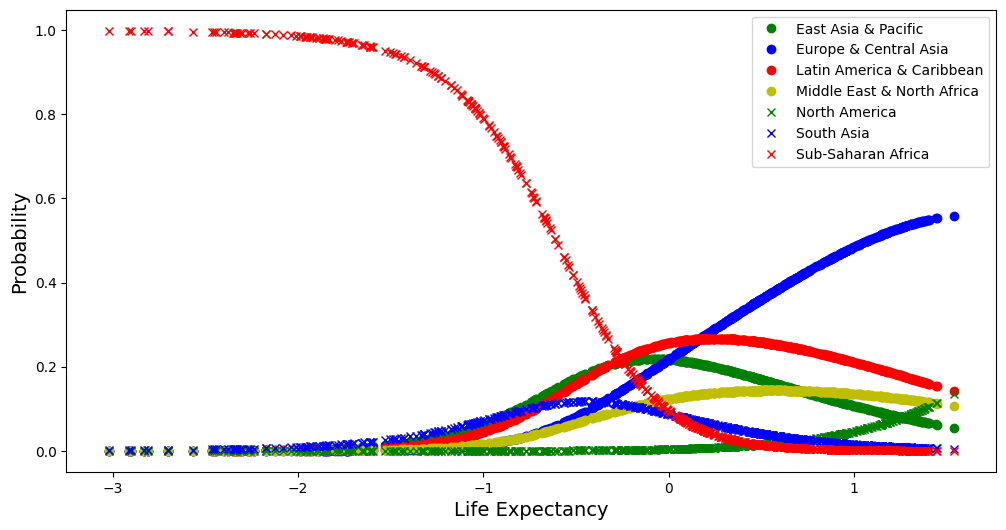

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(X_test, y_proba[:, 0], 'go', linewidth = 2, label = 'East Asia & Pacific')
plt.plot(X_test, y_proba[:, 1], 'bo', linewidth = 2, label = 'Europe & Central Asia')
plt.plot(X_test, y_proba[:, 2], 'ro', linewidth = 2, label = 'Latin America & Caribbean')
plt.plot(X_test, y_proba[:, 3], 'yo', linewidth = 2, label = 'Middle East & North Africa')
plt.plot(X_test, y_proba[:, 4], 'gx', linewidth = 2, label = 'North America')
plt.plot(X_test, y_proba[:, 5], 'bx', linewidth = 2, label = 'South Asia')
plt.plot(X_test, y_proba[:, 6], 'rx', linewidth = 2, label = 'Sub-Saharan Africa')
plt.xlabel('Life Expectancy', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.legend()

### Working with multiple features

In [66]:
X = data[['Life Expectancy', 'CO2', 'Health Expenditure %', 'Education Expenditure %', 'Unemployment']]
y = region_labels

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [68]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [69]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [70]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)

In [71]:
print(log_reg.score(X_train,y_train))
print(log_reg.score(X_test, y_test))

0.6194867682437851
0.594551282051282


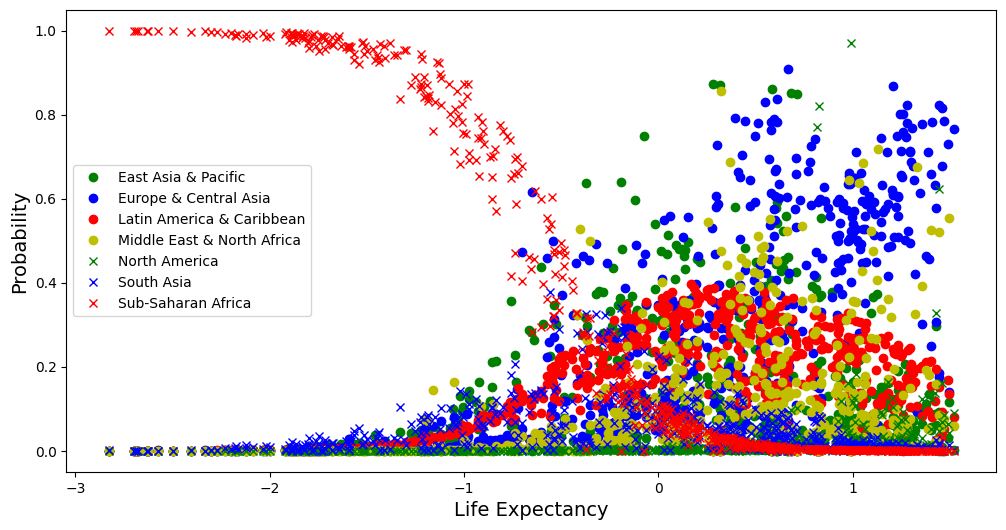

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[:, 0], y_proba[:, 0], 'go', linewidth = 2, label = 'East Asia & Pacific')
plt.plot(X_test[:, 0], y_proba[:, 1], 'bo', linewidth = 2, label = 'Europe & Central Asia')
plt.plot(X_test[:, 0], y_proba[:, 2], 'ro', linewidth = 2, label = 'Latin America & Caribbean')
plt.plot(X_test[:, 0], y_proba[:, 3], 'yo', linewidth = 2, label = 'Middle East & North Africa')
plt.plot(X_test[:, 0], y_proba[:, 4], 'gx', linewidth = 2, label = 'North America')
plt.plot(X_test[:, 0], y_proba[:, 5], 'bx', linewidth = 2, label = 'South Asia')
plt.plot(X_test[:, 0], y_proba[:, 6], 'rx', linewidth = 2, label = 'Sub-Saharan Africa')
plt.xlabel('Life Expectancy', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.legend()

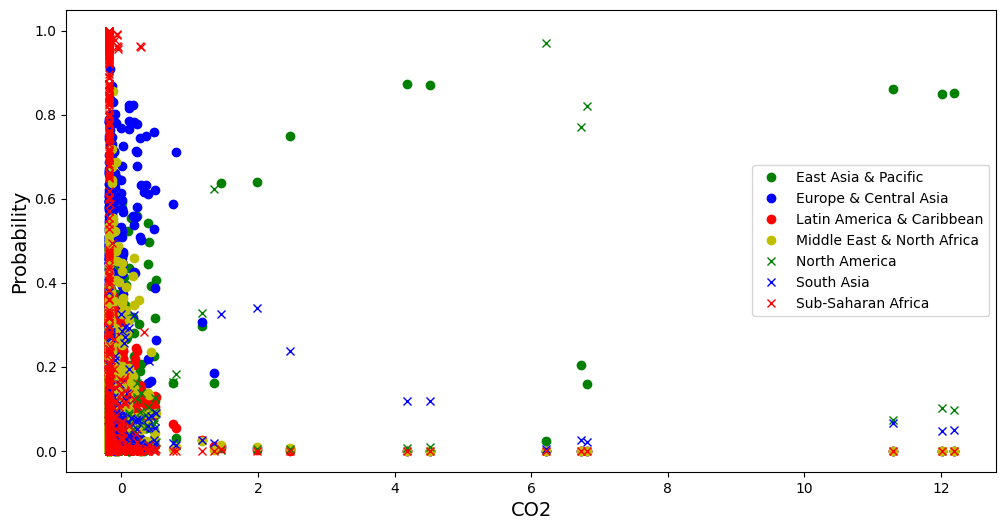

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[:, 1], y_proba[:, 0], 'go', linewidth = 2, label = 'East Asia & Pacific')
plt.plot(X_test[:, 1], y_proba[:, 1], 'bo', linewidth = 2, label = 'Europe & Central Asia')
plt.plot(X_test[:, 1], y_proba[:, 2], 'ro', linewidth = 2, label = 'Latin America & Caribbean')
plt.plot(X_test[:, 1], y_proba[:, 3], 'yo', linewidth = 2, label = 'Middle East & North Africa')
plt.plot(X_test[:, 1], y_proba[:, 4], 'gx', linewidth = 2, label = 'North America')
plt.plot(X_test[:, 1], y_proba[:, 5], 'bx', linewidth = 2, label = 'South Asia')
plt.plot(X_test[:, 1], y_proba[:, 6], 'rx', linewidth = 2, label = 'Sub-Saharan Africa')
plt.xlabel('CO2', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.legend()

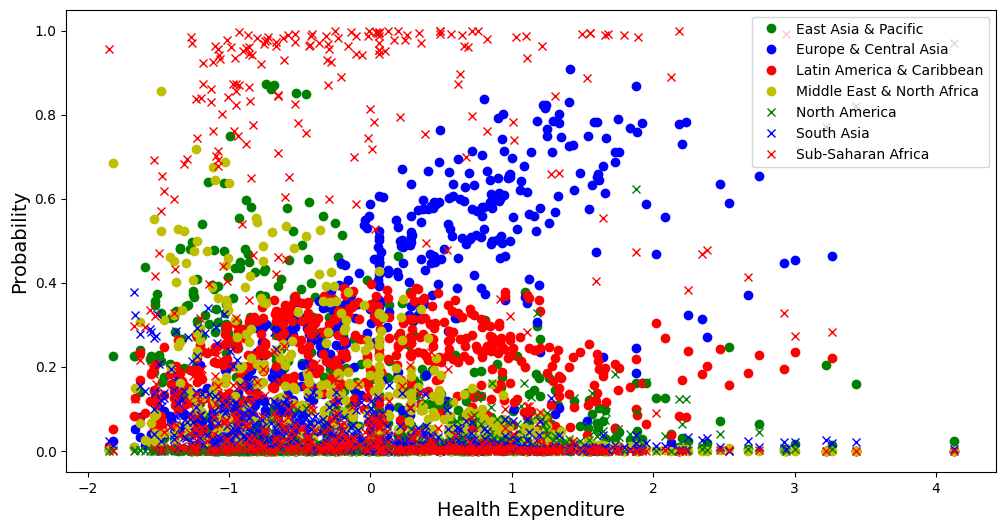

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[:, 2], y_proba[:, 0], 'go', linewidth = 2, label = 'East Asia & Pacific')
plt.plot(X_test[:, 2], y_proba[:, 1], 'bo', linewidth = 2, label = 'Europe & Central Asia')
plt.plot(X_test[:, 2], y_proba[:, 2], 'ro', linewidth = 2, label = 'Latin America & Caribbean')
plt.plot(X_test[:, 2], y_proba[:, 3], 'yo', linewidth = 2, label = 'Middle East & North Africa')
plt.plot(X_test[:, 2], y_proba[:, 4], 'gx', linewidth = 2, label = 'North America')
plt.plot(X_test[:, 2], y_proba[:, 5], 'bx', linewidth = 2, label = 'South Asia')
plt.plot(X_test[:, 2], y_proba[:, 6], 'rx', linewidth = 2, label = 'Sub-Saharan Africa')
plt.xlabel('Health Expenditure', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.legend()

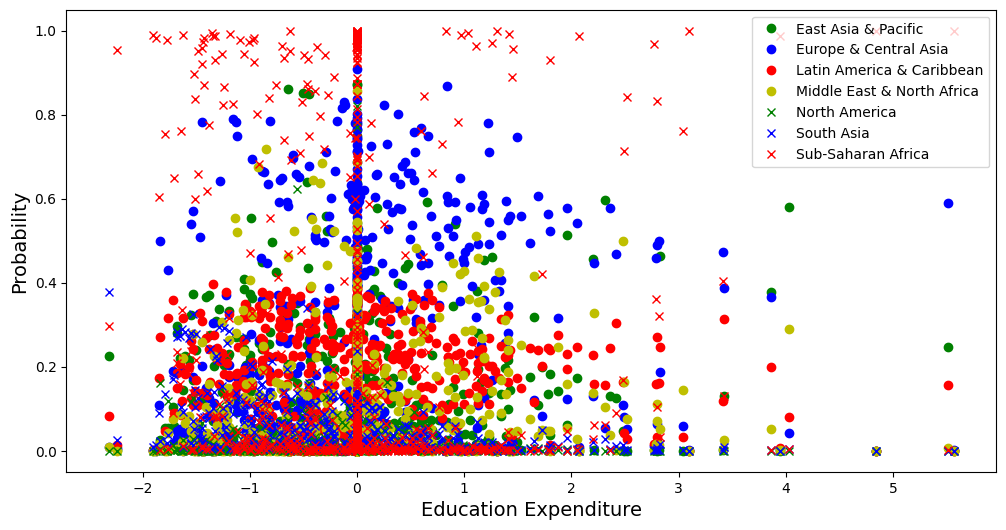

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[:, 3], y_proba[:, 0], 'go', linewidth = 2, label = 'East Asia & Pacific')
plt.plot(X_test[:, 3], y_proba[:, 1], 'bo', linewidth = 2, label = 'Europe & Central Asia')
plt.plot(X_test[:, 3], y_proba[:, 2], 'ro', linewidth = 2, label = 'Latin America & Caribbean')
plt.plot(X_test[:, 3], y_proba[:, 3], 'yo', linewidth = 2, label = 'Middle East & North Africa')
plt.plot(X_test[:, 3], y_proba[:, 4], 'gx', linewidth = 2, label = 'North America')
plt.plot(X_test[:, 3], y_proba[:, 5], 'bx', linewidth = 2, label = 'South Asia')
plt.plot(X_test[:, 3], y_proba[:, 6], 'rx', linewidth = 2, label = 'Sub-Saharan Africa')
plt.xlabel('Education Expenditure', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.legend()

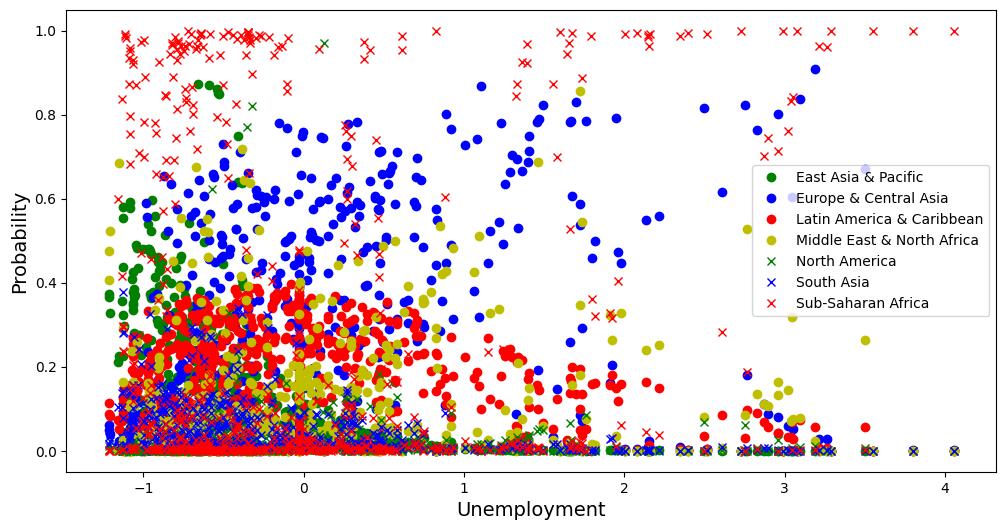

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[:, 4], y_proba[:, 0], 'go', linewidth = 2, label = 'East Asia & Pacific')
plt.plot(X_test[:, 4], y_proba[:, 1], 'bo', linewidth = 2, label = 'Europe & Central Asia')
plt.plot(X_test[:, 4], y_proba[:, 2], 'ro', linewidth = 2, label = 'Latin America & Caribbean')
plt.plot(X_test[:, 4], y_proba[:, 3], 'yo', linewidth = 2, label = 'Middle East & North Africa')
plt.plot(X_test[:, 4], y_proba[:, 4], 'gx', linewidth = 2, label = 'North America')
plt.plot(X_test[:, 4], y_proba[:, 5], 'bx', linewidth = 2, label = 'South Asia')
plt.plot(X_test[:, 4], y_proba[:, 6], 'rx', linewidth = 2, label = 'Sub-Saharan Africa')
plt.xlabel('Unemployment', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.legend()

### Comparing Different Classification Models

In [77]:
X = data.drop(columns=['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia', 'Middle East & North Africa', 'Latin America & Caribbean', 'East Asia & Pacific', 'North America'])

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

In [79]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
class_train = {}
class_test = {}
class_t = {}

#### SVM

In [82]:
from sklearn.svm import SVC

In [83]:
svm_train, svm_test, svm_time = model(SVC(C=1000),X_train,y_train,X_test,y_test)
class_train['SVM'] = svm_train
class_test['SVM'] = svm_test
class_t['SVM'] = svm_time

#### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
tree_train, tree_test, tree_time = model(DecisionTreeClassifier(),X_train,y_train,X_test,y_test)
class_train['DecTree'] = tree_train
class_test['DecTree'] = tree_test
class_t['DecTree'] = tree_time

#### MLP

In [86]:
from sklearn.neural_network import MLPClassifier

In [87]:
mlp_train, mlp_test, mlp_time = model(MLPClassifier(max_iter=2000),X_train,y_train,X_test,y_test)
class_train['MLP'] = mlp_train
class_test['MLP'] = mlp_test
class_t['MLP'] = mlp_time

#### K Neighbors

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn_train, knn_test, knn_time = model(KNeighborsClassifier(),X_train,y_train,X_test,y_test)
class_train['KNN'] = knn_train
class_test['KNN'] = knn_test
class_t['KNN'] = knn_time

#### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
log_train, log_test, log_time = model(LogisticRegression(max_iter=2000),X_train,y_train,X_test,y_test)
class_train['LogReg'] = log_train
class_test['LogReg'] = log_test
class_t['LogReg'] = log_time

#### Comparing Classification Models

In [92]:
class_train_keys = class_train.keys()
class_train_values = class_train.values()
class_test_keys = class_test.keys()
class_test_values = class_test.values()
class_time_keys = class_t.keys()
class_time_values = class_t.values()

In [93]:
barWidth = 0.25
br1 = np.arange(len(class_train))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

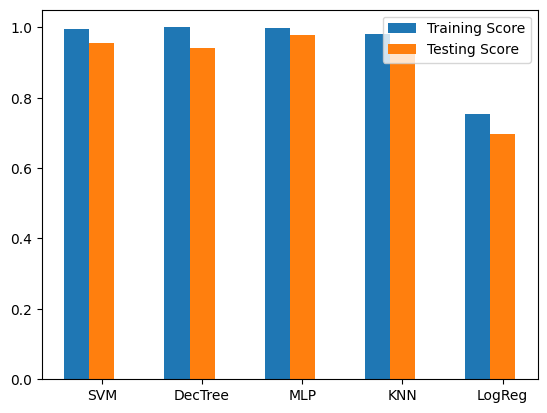

In [94]:
plt.bar(br1,class_train_values,label="Training Score",width=barWidth)
plt.bar(br2,class_test_values,label="Testing Score",width=barWidth)
plt.xticks([r + barWidth for r in range(len(class_train))],
        list(class_train.keys()))

plt.legend()

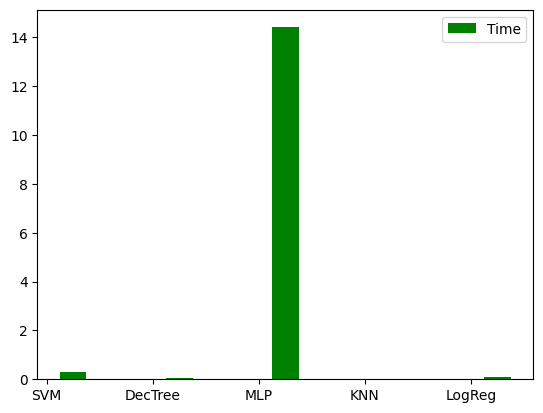

In [95]:
plt.bar(br3,class_time_values,label="Time",width=barWidth,color='green')
plt.xticks([r + barWidth for r in range(len(class_train))],
        list(class_train.keys()))

plt.legend()

In [96]:
classTable = PrettyTable()

In [97]:
classTable.add_column("Metric",["Training Score","Testing Score","Time"])
for i in range(len(list(class_train.values()))):
    classTable.add_column(list(class_train.keys())[i],np.round(np.array([list(class_train.values())[i],list(class_test.values())[i],list(class_t.values())[i]]),decimals=2))
classTable

Metric,SVM,DecTree,MLP,KNN,LogReg
Training Score,1.0,1.0,1.0,0.98,0.75
Testing Score,0.96,0.94,0.98,0.93,0.7
Time,0.31,0.05,14.41,0.01,0.1


### Feature Ranking for Classification

Next we are going to rank the features using sklearn RFE. That way we can see what features affect the region a country belongs to the most. This will give us a better idea of the factors that go into seperate different regions via their socio-economics

In [98]:
estimator = SVC(C=100,kernel='linear')
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)

In [99]:
for j in range(0,6):
    for i in range(len(selector.ranking_)):
        if selector.ranking_[i] == j:
            print(list(X)[i],"is ranked in position",j)

Communicable is ranked in position 1
NonCommunicable is ranked in position 2
Injuries is ranked in position 3
CO2 is ranked in position 4
Life Expectancy is ranked in position 5


## Results
We broke up our project into two models, a regression model to predict the life expectancy of countries and a classification model to predict the region of a country. We started by creating a baseline model for both. Our baseline model for the regression was a linear regression. And this model did not do well. It had a training score of 14% and a testing score of 7%.  

We compared 5 models, a linear regression, an SVM, an MLP, a Lasso Regression, and a Ridge Regression. The best model was the SVM because it had the best results, but still ran in a reasonable amount of time. The SVM had a training score of 98%, a testing score of 97% and ran in about 3.5 seconds.  

For the regression we also wanted to rank the features. We found that the top five features were a country was in the Sub-Saharan region, the prevalence of undernourishment in a country, whether that region was marked as high income, whether that country has a lot of communicable diseases, and finally whether a country has a lot of non-communicable diseases. Ranking features gives us an idea of which features affect life expectancy the most.

For the second half of our project, we chose Logistic Regression to be our baseline function. Again, our baseline function didn’t have a great accuracy score. It had a training score of 50% and a testing score of 49%. We chose to compare our base model Logistic Regression, an SVM, an MLP, a Decision Tree, and a K-Nearest Neighbors.

We found that that K-Nearest Neighbors classifier did the best job. It had a testing score of 98%, a 96% training score and it took .0004 seconds to run. This is a really efficient model, which is good because it won’t take up a lot of time or computational power.  

Like we did for the regression model, we wanted to rank the features that most affected the classification of a country’s region. We found that the deaths due to communicable diseases was ranked at 1. Deaths due to non-communicable diseases were ranked at 2. The percentage of CO2 per square meter was ranked at 3. Deaths due to injuries were ranked at 4. And the life expectancy was ranked at 5. Being able to rank the features like this gives us a better understanding of what socio-economic features split up the regions. 